# E-tivity 3: : Linear Regression

## Student Name: Garret Molloy
## Student ID: 9021906

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split

# Task 4  (CE6002)
- Copy your linear classification algorithm to the notebook
- Change your linear classification algorithm to make it suitable for linear regression
- Use this to obtain the best possible fit to the data set Task4.csv
- Your regression performance should improve if you add some new features
- Also, use an algorithm from the scikit-learn toolbox to see if you can do better
- You should not add any other imports than those necessary for your chosen scikit-learn algorithm.


In [2]:
# Read in data file
df = pd.read_csv('Task4.csv')

In [3]:
df.shape

(100, 2)

In [4]:
df.head()

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [5]:
X = np.array(df['X'].values, dtype=float)
y = np.array(df['y'].values, dtype=float)

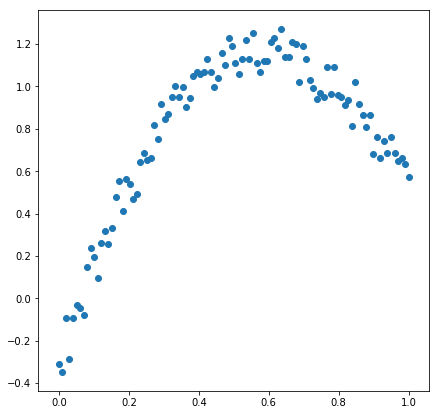

In [6]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X,y)
plt.show()

#### Bring in Methods from Linear Classification
Add new method for Linear Regression (remove sign() )

In [7]:
def linear_classification(x,w):
    #Linear Classificaion is the sign of the dot product of weights(transposed) and input vector eights
    # its sgn determines the class allocation
    return np.sign(w.T.dot(x))

In [8]:
# Changing Classificaiton to Regression Predict Value
def linear_regression_predict(x,w):
    #print("X:", x.shape,"w:", w.shape, "Result=Wt.X")
    #Linear Classificaion is the sign of the dot product of weights(transposed) and input vector eights
    # its sgn determines the class allocation
    return (w.T.dot(x))



In [9]:
# Homemade Linear Regression from scratch (didn't think I could do it!!
from numpy.linalg import inv

def linear_regression(X, y):
    # X dagger = Psuedo Inverse =        (Xt * X)^-1 * Xt
    psuedo_inverse = np.matmul(inv(np.matmul(X.T, X)), X.T)    # Yaay! one line!!
    # return w = X dagger * Xt
    return np.matmul(psuedo_inverse, y) # return w

In [10]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [11]:
def calc_error_RMSE(predicted, actual):
    # Function to calculate the Mean squared error
    # Sum of (h(xn) - yn)**2 for all N samples / N
    sum = 0
    for hx, y in zip(predicted, actual):
        sum += ((hx - y)**2)
        # print(hx,y,((hx - y)**2),sum)
    #print("samples:", predicted.shape[0])
    mse = sum / predicted.shape[0]
    rmse = math.sqrt(mse)
    print("RMSE Error: {:0.3f}".format(rmse))
    score = 1 - rmse 
    print("Score: {:0.3f}".format(score))
    return #rmse

In [12]:
# Add Bias to input features
shape = X.shape
new_X = np.ones((shape[0],2))
new_X[:,1] = X

In [13]:
# Split the data in to train and test (80/20 split) and ensure the data is shuffled.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2, shuffle=True, random_state=42)

In [14]:
X_train.shape

(80, 2)

In [15]:
y_train.shape

(80,)

In [16]:
X_test.shape

(20, 2)

In [17]:
weights = linear_regression(X_train, y_train)

In [18]:
weights

array([0.42876122, 0.72390652])

   ## Plot Features & Predicited Values from My Logistic Regression

In [19]:
# We want to plot in red the predictions are linear regression would provide for the test data
y_predict = np.asarray([linear_regression_predict(x, weights) for x in X_test] )

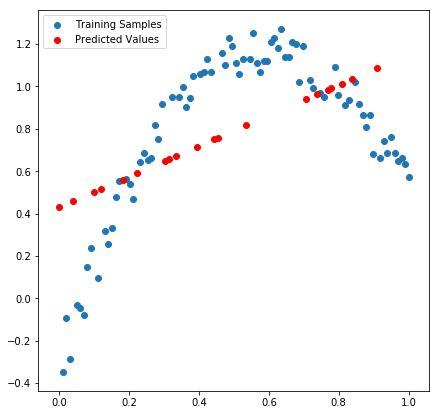

In [20]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_train[:,1],y_train[:], label="Training Samples")
plt.scatter(X_test[:,1],y_predict, color='r', label='Predicted Values')
plt.legend()
plt.show()

Not a great match, even if I do not look at the vizualization but check the Eout Scores:
    

In [21]:
calc_error_RMSE(y_predict, y_test)

RMSE Error: 0.306
Score: 0.694


## Add new Features x<sup>2</sup>

In [22]:
# Here I am adding new features to the above
X_train_transformed = np.asarray([(bias, x1, x1**2) for (bias, x1) in X_train])
X_test_transformed  = np.asarray([(bias, x1, x1**2) for (bias, x1) in X_test])

In [23]:
weights2 = linear_regression(X_train_transformed, y_train)

In [24]:
weights2

array([-0.28548779,  4.89446178, -4.09325841])

In [25]:
y_predict2 = np.asarray([linear_regression_predict(x, weights2) for x in X_test_transformed] )


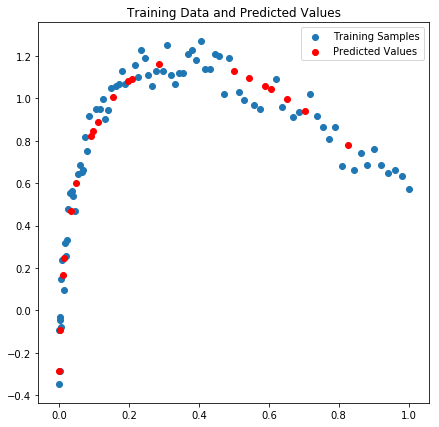

In [26]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_train_transformed[:,2],y_train[:], label="Training Samples")
plt.scatter(X_test_transformed[:,2],y_predict2, color='r', label='Predicted Values')
plt.title("Training Data and Predicted Values")
plt.legend()
plt.show()

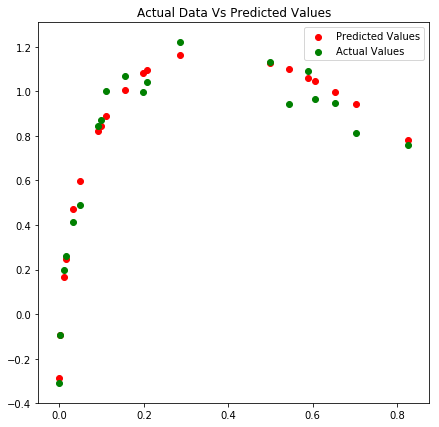

In [27]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_test_transformed[:,2],y_predict2, color='r', label='Predicted Values')
plt.scatter(X_test_transformed[:,2],y_test, color='g', label='Actual Values')
plt.title("Actual Data Vs Predicted Values")

plt.legend()
plt.show()

In [28]:
calc_error_RMSE(y_predict2, y_test)

RMSE Error: 0.070
Score: 0.930


Looks Good
## Add Fatures x<sup>3</sup>

In [29]:
# Here I am adding new features to the above
X_train_transformed2 = np.asarray([(bias, x1, x1**2, x1**3) for (bias, x1) in X_train])
X_test_transformed2  = np.asarray([(bias, x1, x1**2, x1**3) for (bias, x1) in X_test])

In [30]:
weights3 = linear_regression(X_train_transformed2, y_train)

In [31]:
y_predict3 = np.asarray([linear_regression_predict(x, weights3) for x in X_test_transformed2] )


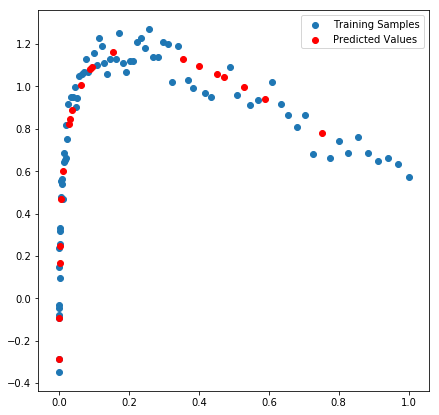

In [32]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_train_transformed2[:,3],y_train[:], label="Training Samples")
plt.scatter(X_test_transformed2[:,3],y_predict2, color='r', label='Predicted Values')
plt.legend()
plt.show()

In [33]:
calc_error_RMSE(y_predict3, y_test)

RMSE Error: 0.068
Score: 0.932


#### Results:
- Original Data had a score of 69%
- Adding <b>X<sup>2</sup></b> and we saw a large jump in accuracy wih a score of 93%
- Adding one more additional feature <b>X<sup>3</sup></b> saw a slight increase to 93.2%

## Compare REsults after using SVR from scikit learn

In [34]:
from sklearn import svm
svr = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
svr.fit(X_train, y_train) 
svr.predict([[1, 1]])
#array([1.5])

D:\Python\Miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.73634576])

In [35]:
X_train[0]

array([1.   , 0.556])

NameError: name 'printplt' is not defined

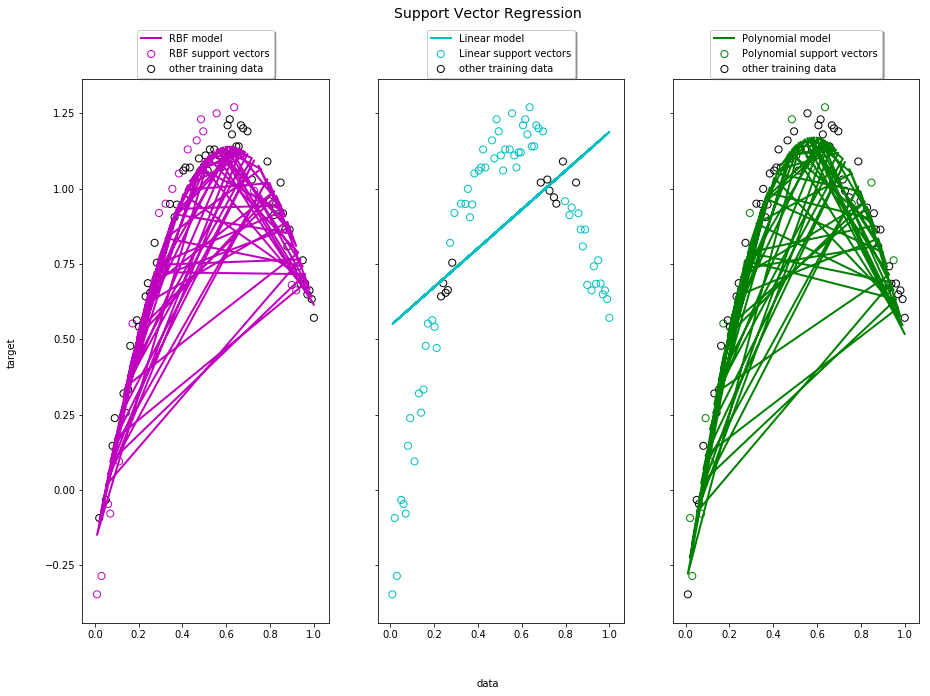

In [36]:

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = X_train
y = y_train
X = X[:,1:]


svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
printplt.show()

## Scores from SVR (3 Types) and Original Data - X

In [ ]:
X = X_train
y = y_train
X = X[:,1:] # Drop bias column


print("Original Data with SVR - 3 types")
print("Feature Shape:", X.shape)
print("Sample:", X[0],"\n")

for ix, svr in enumerate(svrs):
    print("{:0.3f} Score for {} Model on Out of Sample Data:".format(svr.fit(X, y).score(X_test[:,1:], y_test), kernel_label[ix]))


## Scores from SVR (3 Types) and Data with 1 additional Feature - X, X<sup>2</sup>

In [ ]:
X = X_train_transformed
X = X[:,1:] # Drop bias column


print("Transformed Data with SVR - 3 types (X^2 feature added)")
print("Feature Shape:", X.shape)
print("Sample:", X[0],"\n")

for ix, svr in enumerate(svrs):
    print("{:0.3f} Score for {} Model on Out of Sample Data:".format(svr.fit(X, y).score(X_test_transformed[:,1:], y_test), kernel_label[ix]))


## Scores from SVR (3 Types) and Data with 2 additional Features - X, X<sup>2</sup>, X<sup>3</sup>

In [ ]:
X = X_train_transformed2
X = X[:,1:]

print("Transformed Data with SVR - 3 types (X^2 & X^3 features added)")
print("Feature Shape:", X.shape)
print("Sample:", X[0],"\n")

for ix, svr in enumerate(svrs):
    print("{:0.3f} Score for {} Model on Out of Sample Data:".format(svr.fit(X, y).score(X_test_transformed2[:,1:], y_test), kernel_label[ix]))


We can our original additional Feature had a significant level of accuracy (93%) after adding the X<sup>2</sup> feature.

Then we used scikit Learn's <b>Support Vector Regression </b> which is an extension of their Support Vector Classification for  regresion from their SVM toolkit (Support Vector Machines).

As an advanced algorithm I was certain we should see an improvement, and even with he original data with one feature we see a high score withthe Polynomial Model version (which I expect by the name automaticaly adds new features as we did in the polynomialspace, X<sup>2</sup> etc.)

The other kernel models RBF (Radial Basis Function ) scored well at 96% on the original data, not sure what enhancements it does to achieve this.

The Linear Model needed the additional feature X<sup>2</sup> to score well and then outperformed my method 93% to 98%

The model produced by Support Vector Regression depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.
